<a href="https://colab.research.google.com/github/JustinHuang4/PlantDoc-An-App-to-Diagnose-Plants/blob/main/PlantDocAIModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PlantDocAIModel
by Justin Huang

Using the latest technology and software to build an application to aid farmers, planters, and gardeners alike in diagnosing and nurturing their plants.


##Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob

Mounted at /content/drive


In [12]:

Apple___Black_rot = '/content/drive/MyDrive/PlantDiseaseImgs/Apple___Black_rot'
Apple___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Apple___healthy'
Cherry____healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Cherry_(including_sour)___healthy'
Cherry____Powdery_mildew = '/content/drive/MyDrive/PlantDiseaseImgs/Cherry_(including_sour)___Powdery_mildew'
Corn____healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Corn_(maize)___healthy'
Corn____Northern_Leaf_Blight = '/content/drive/MyDrive/PlantDiseaseImgs/Corn_(maize)___Northern_Leaf_Blight'
Grape___Black_rot = '/content/drive/MyDrive/PlantDiseaseImgs/Grape___Black_rot'
Grape___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Grape___healthy'
Potato___Early_blight = '/content/drive/MyDrive/PlantDiseaseImgs/Potato___Early_blight'
Potato___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Potato___healthy'
Tomato___Bacterial_spot = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___Bacterial_spot'
Tomato___healthy = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___healthy'
Tomato___Tomato_mosaic_virus = '/content/drive/MyDrive/PlantDiseaseImgs/Tomato___Tomato_mosaic_virus'

Apple___Black_rot = [cv2.imread(image) for image in glob.glob(Apple___Black_rot)]
Apple___healthy = [cv2.imread(image) for image in glob.glob(Apple___healthy)]
Cherry____healthy = [cv2.imread(image) for image in glob.glob(Cherry____healthy)]
Cherry____Powdery_mildew = [cv2.imread(image) for image in glob.glob(Cherry____Powdery_mildew)]
Corn____healthy = [cv2.imread(image) for image in glob.glob(Corn____healthy)]
Corn____Northern_Leaf_Blight  = [cv2.imread(image) for image in glob.glob(Corn____Northern_Leaf_Blight)]
Grape___Black_rot = [cv2.imread(image) for image in glob.glob(Grape___Black_rot)]
Grape___healthy = [cv2.imread(image) for image in glob.glob(Grape___healthy)]
Potato___Early_blight = [cv2.imread(image) for image in glob.glob(Potato___Early_blight)]
Potato___healthy = [cv2.imread(image) for image in glob.glob(Potato___healthy)]
Tomato___Bacterial_spot = [cv2.imread(image) for image in glob.glob(Tomato___Bacterial_spot)]
Tomato___healthy = [cv2.imread(image) for image in glob.glob(Tomato___healthy)]
Tomato___Tomato_mosaic_virus = [cv2.imread(image) for image in glob.glob(Tomato___Tomato_mosaic_virus)]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantDiseaseImgs',
    validation_split = 0.2,
    subset = "training",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 64
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantDiseaseImgs',
    validation_split = 0.2,
    subset = "validation",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 64
)





train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)


Found 2430 files belonging to 13 classes.
Using 1944 files for training.
Found 2430 files belonging to 13 classes.
Using 486 files for validation.


##Model



In [16]:

model = Sequential ([
    
    
    layers.Rescaling(1/255, input_shape = (256, 256, 3)),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(13, activation = 'softmax')
])
model.summary()
'''

model = Sequential ([
    layers.Rescaling(1./255, input_shape = (227, 227, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(2)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 70
)
model.save('PlantDocModel.h5')
'''

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

"\n\nmodel = Sequential ([\n    layers.Rescaling(1./255, input_shape = (227, 227, 3)),\n    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Flatten(),\n    layers.Dense(128, activation = 'relu'),\n    layers.Dense(2)\n])\n\nmodel.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])\n\nmodel.fit (\n    train_dataset, \n    validation_data = val_dataset,\n    epochs = 70\n)\nmodel.save('PlantDocModel.h5')\n"

In [17]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
'''
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'],  run_eagerly=True
)

'''
model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 90
)


Epoch 1/90
31/31 [==============================] - 37s 235ms/step - loss: 1.8741 - accuracy: 0.5360 - val_loss: 2.0212 - val_accuracy: 0.5947
Epoch 2/90
31/31 [==============================] - 7s 217ms/step - loss: 1.5703 - accuracy: 0.5612 - val_loss: 1.5010 - val_accuracy: 0.6070
Epoch 3/90
31/31 [==============================] - 7s 215ms/step - loss: 1.2006 - accuracy: 0.6193 - val_loss: 1.0924 - val_accuracy: 0.6831
Epoch 4/90
31/31 [==============================] - 7s 218ms/step - loss: 0.8553 - accuracy: 0.7310 - val_loss: 0.9680 - val_accuracy: 0.7243
Epoch 5/90
31/31 [==============================] - 7s 216ms/step - loss: 0.5961 - accuracy: 0.8107 - val_loss: 0.8207 - val_accuracy: 0.7819
Epoch 6/90
31/31 [==============================] - 7s 224ms/step - loss: 0.4543 - accuracy: 0.8493 - val_loss: 0.6630 - val_accuracy: 0.8251
Epoch 7/90
31/31 [==============================] - 7s 217ms/step - loss: 0.2746 - accuracy: 0.9074 - val_loss: 0.6521 - val_accuracy: 0.8539
Epoch

##Evaluate Performance

Text(0.5, 1.0, 'Training-Validation Accuracy')

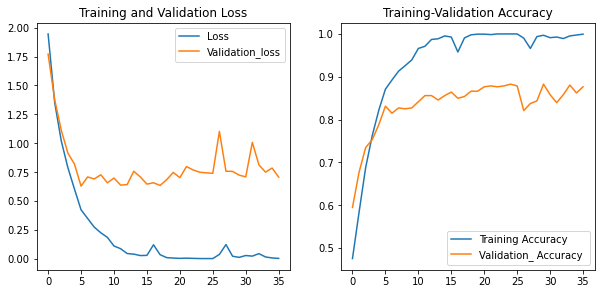

In [10]:
loss = pd.DataFrame(model.history.history) 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

##Save Model For Web Application Deployment

In [18]:
model.save('PlantDocModel2.h5')


##Streamlit installations

In [19]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install st-btn-select

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.70.0
    Uninstalling google-api-python-client-2.70.0:
      Successfully uninstalled google-api-python-client-2.70.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p